In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)


In [72]:
df = pd.read_excel('UPCAT_DATA2(2).xlsx', sheet_name='AllData')
df

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005,77,82.0,86,94,87,92.0,84,80,92,1.4764,1.5045,1.40980,1,55.0,28,1,4.0,1
1,2005,57,57.0,59,55,46,57.0,53,45,53,2.6557,2.7000,2.70080,1,38.0,19,5,3.0,0
2,2005,55,52.0,55,57,53,51.0,57,62,51,2.6132,2.6818,2.71720,0,17.0,9,5,6.0,0
3,2005,69,78.0,78,87,79,79.0,83,82,79,1.7217,1.6136,1.70490,1,45.0,28,1,4.0,0
4,2005,64,71.0,68,71,57,54.0,60,59,55,2.4245,2.4318,2.47130,1,67.0,56,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2014,53,56.0,52,55,52,58.0,63,51,51,2.5577,2.6089,2.72984,1,26.0,23,1,5.0,0
1006,2014,59,67.0,57,71,61,64.0,67,63,67,2.4135,2.3589,2.32258,0,24.0,30,1,4.0,0
1007,2014,84,83.0,85,93,89,92.0,89,96,93,1.5192,1.4597,1.43952,0,86.0,72,1,4.0,1
1008,2014,78,83.0,77,82,62,69.0,84,71,70,1.7115,1.9556,2.02016,0,72.0,48,1,4.0,0


# Handling Missing Data

It can be seen that only a few rows have missing values, therefore we can drop these rows while still getting hold of most of the information. Another approach is to impute the data. We can try out different ways to impute the data.

In [73]:
df.isna().sum()

Batch     0
Eng7      0
Eng8      1
Eng9      0
Math7     0
Math8     0
Math9     1
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      1
UP        0
IQ        1
SA        0
C1        0
C2        2
Target    0
dtype: int64

In [74]:
def nan_imputer(df, mode='mean'):
    cols = df.columns

    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(missing_values=np.nan, strategy=mode)
    imputer.fit(df.values)
    df_new = pd.DataFrame(imputer.transform(df.values), columns=cols)
    return df_new

In [75]:
df_new = nan_imputer(df)
df_new

,Batch,Eng7,Eng8,Eng9,Math7,Math8,Math9,Sci7,Sci8,Sci9,GWA7,GWA8,GWA9,UP,IQ,SA,C1,C2,Target
0,2005.0,77.0,82.0,86.0,94.0,87.0,92.0,84.0,80.0,92.0,1.4764,1.5045,1.40980,1.0,55.0,28.0,1.0,4.0,1.0
1,2005.0,57.0,57.0,59.0,55.0,46.0,57.0,53.0,45.0,53.0,2.6557,2.7000,2.70080,1.0,38.0,19.0,5.0,3.0,0.0
2,2005.0,55.0,52.0,55.0,57.0,53.0,51.0,57.0,62.0,51.0,2.6132,2.6818,2.71720,0.0,17.0,9.0,5.0,6.0,0.0
3,2005.0,69.0,78.0,78.0,87.0,79.0,79.0,83.0,82.0,79.0,1.7217,1.6136,1.70490,1.0,45.0,28.0,1.0,4.0,0.0
4,2005.0,64.0,71.0,68.0,71.0,57.0,54.0,60.0,59.0,55.0,2.4245,2.4318,2.47130,1.0,67.0,56.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2014.0,53.0,56.0,52.0,55.0,52.0,58.0,63.0,51.0,51.0,2.5577,2.6089,2.72984,1.0,26.0,23.0,1.0,5.0,0.0
1006,2014.0,59.0,67.0,57.0,71.0,61.0,64.0,67.0,63.0,67.0,2.4135,2.3589,2.32258,0.0,24.0,30.0,1.0,4.0,0.0
1007,2014.0,84.0,83.0,85.0,93.0,89.0,92.0,89.0,96.0,93.0,1.5192,1.4597,1.43952,0.0,86.0,72.0,1.0,4.0,1.0
1008,2014.0,78.0,83.0,77.0,82.0,62.0,69.0,84.0,71.0,70.0,1.7115,1.9556,2.02016,0.0,72.0,48.0,1.0,4.0,0.0


No more NaNs!

In [76]:
df_new.isna().sum()

Batch     0
Eng7      0
Eng8      0
Eng9      0
Math7     0
Math8     0
Math9     0
Sci7      0
Sci8      0
Sci9      0
GWA7      0
GWA8      0
GWA9      0
UP        0
IQ        0
SA        0
C1        0
C2        0
Target    0
dtype: int64

# Load UPCAT Data

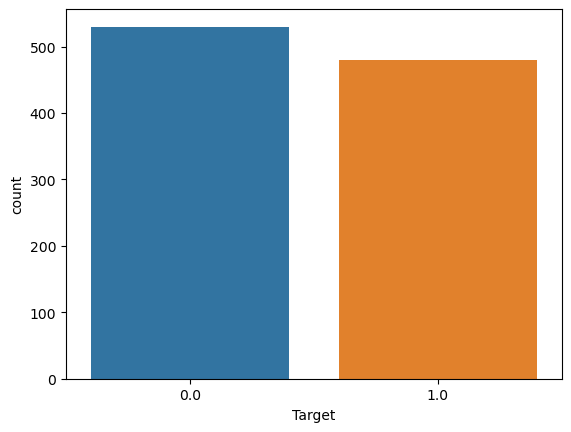

In [77]:
sns.countplot(df_new['Target'], label='Count')
plt.show()

# PCC

In [78]:
N = df_new.shape[0]
n_pass = df_new.groupby('Target')['GWA7'].count()[1]
n_fail = df_new.groupby('Target')['GWA7'].count()[0]
PCC = (n_pass/N)**2 + (n_fail / N)**2
print(f'PCC = {PCC * 100 : .2f}',
      f'\nMinimum Acceptable Prediction Score = {125*PCC: .2f}')


PCC =  50.12 
Minimum Acceptable Prediction Score =  62.65


# Handling of Categorical

in this case we do not have Categorical variables. Otherwise, do OHE or ordinal conversion

# Scaling Function

Note that we scale only on the splitting of the data, specifically on the **FULL TRAIN SET**. We will use sklearn's `MinMaxScaler` from `sklearn.preprocessing`

In [79]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler = MinMaxScaler()

# Train Test Split

split the data into X_train, X_test, y_train, y_test

   scale X_train and X_test using the min/max or mean/std of X_train
   
   define the parameter grid which would be passed in the GridSearchCV
   
   call GridSearchCV, passing in the model that you want to fit and the list of parameters that you want to iterate
   
   fit the model using GridSearchCV using the training data
   
   use the optimal hyperparameters to fit the same model using the test data

In [80]:
X = df_new.drop('Target', axis=1)
y = df_new.loc[:, 'Target']

In [81]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                              y,
                                                             test_size=0.2,
                                                              random_state=1337)
# scale the X_train_full and X_test
X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

X_test_scaled = MM_scaler.transform(X_test.astype(float))


# Classifier AutoML

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
n_trials = 10

## KNN

In [84]:
def clf_knn(X, y, max_k):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.neighbors import KNeighborsClassifier
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    parameters = {'n_neighbors': list(range(1,max_k+1))}

    GS = GridSearchCV(
        KNeighborsClassifier(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    
    # plotting error bars
    plt.errorbar(parameters['n_neighbors'], GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(parameters['n_neighbors'],  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
#     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.axvline(best_k+1, color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()
    
    test_score_list = []
    for seed in range(n_trials):
        
        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))


        
        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)
    test_score_means = np.mean(test_score_list)
    
    
    
    best_params = GS.best_params_
    print(f'best params = {best_params}')

    print(f'best model = {best_model}')
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return (
        ['Knn',
        'n_neighbor',
        best_k+1,
        GS.cv_results_['mean_test_score'][best_k],
        GS.best_score_,
        test_score_means,
        'NA',
        runtime
        ]
    )

KNeighborsClassifier(n_neighbors=42)


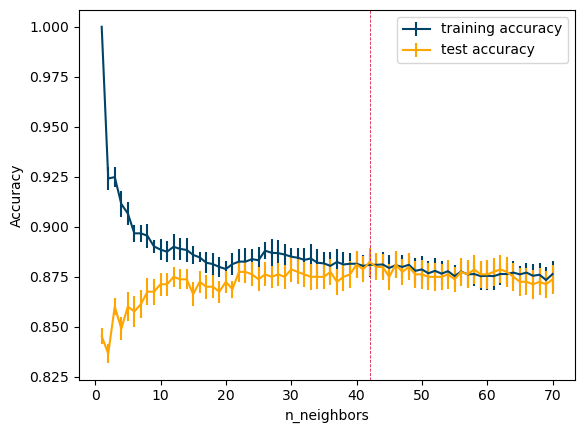

best params = {'n_neighbors': 42}
best model = KNeighborsClassifier(n_neighbors=42)


['Knn',
 'n_neighbor',
 42,
 0.8824257425742574,
 0.8824257425742574,
 0.8732673267326734,
 'NA',
 22.471611738204956]

In [85]:
res_knn = clf_knn(X, y, 70)
res_knn

## SVC (l1 or l2)

In [86]:
def train_svc(X, y, mode):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.svm import LinearSVC
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
        
    
    C_list = np.logspace(-3,3,10)
    if mode == 'l1':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'loss': ['squared_hinge'],
                      'dual' : [False]}
    elif mode == 'l2':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      }

    
    GS = GridSearchCV(
        LinearSVC(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_c_idx = GS.cv_results_['mean_test_score'].argmax()
    best_c = GS.best_params_['C']
    best_val_acc = GS.cv_results_['mean_test_score'][best_c_idx]
    best_train_acc = GS.cv_results_['mean_train_score'][best_c_idx]

    # plotting error bars
    plt.errorbar(C_list, GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(C_list,  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
    #     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xscale('log')
    plt.xlabel("C")
    plt.axvline(C_list[best_c_idx], color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()

    # testing test set using optimal model
    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.coef_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)[0]
    coefs_mean

    # plotting top predictors
    # len(coefs_mean)
    
    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()

    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return [f'SVC Regression ({mode})', 'C', best_c, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

LinearSVC(C=2.154434690031882, dual=False, penalty='l1')


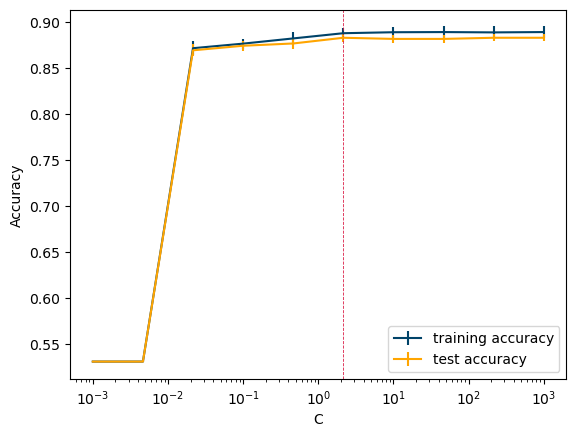

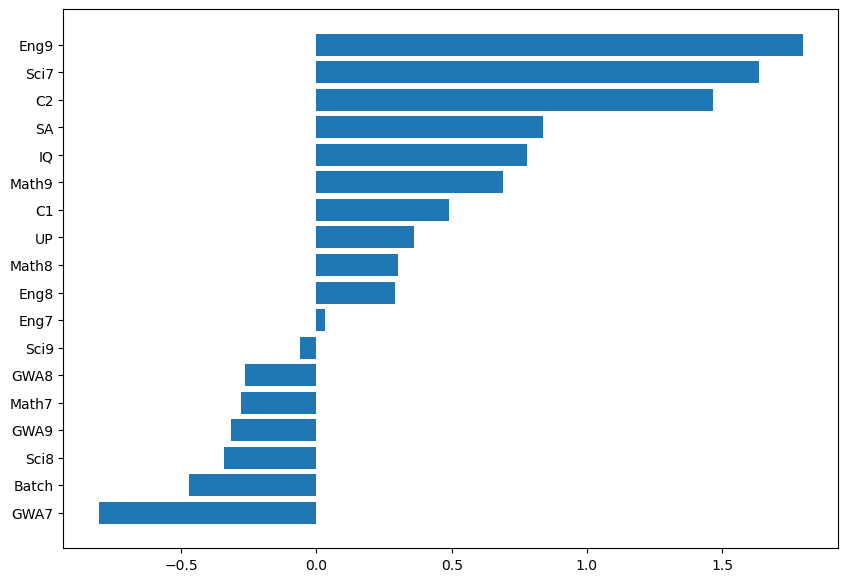

['Logistic Regression (l1)',
 'C',
 2.154434690031882,
 0.8873762376237624,
 0.8824257425742574,
 0.8707920792079207,
 'Eng9',
 2.3228180408477783]

In [87]:
res_svc_l1 = train_svc(X,y,'l1')
res_svc_l1

LinearSVC(C=0.46415888336127775)


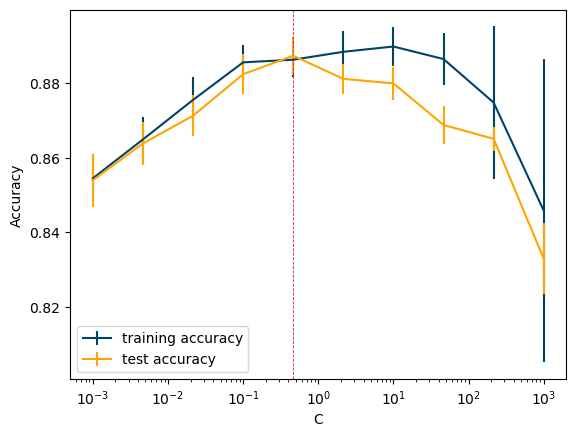

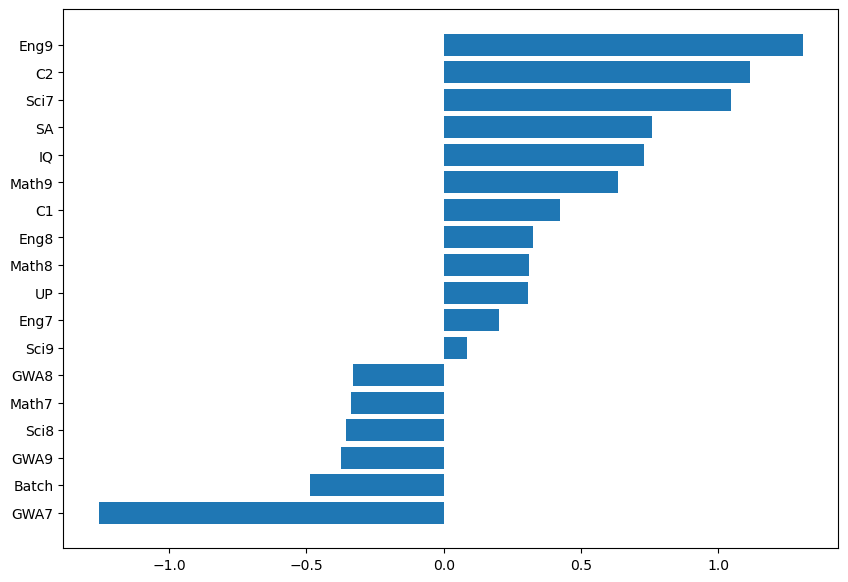

['Logistic Regression (l2)',
 'C',
 0.46415888336127775,
 0.8863154172560113,
 0.8873762376237624,
 0.8792079207920793,
 'Eng9',
 1.4231910705566406]

In [88]:
res_svc_l2 = train_svc(X,y, 'l2')
res_svc_l2

## Logistic Regression

In [89]:
def train_logistic(X, y, mode):
    import time
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
        
    
    C_list = np.logspace(-3,3,10)
    
    if mode == 'l1':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'solver': ['liblinear']}
    if mode == 'l2':
        parameters = {'C': C_list,
                      'penalty': [mode],
                      'dual': [False]}

    
    GS = GridSearchCV(
        LogisticRegression(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_c_idx = GS.cv_results_['mean_test_score'].argmax()
    best_c = GS.best_params_['C']
    best_val_acc = GS.cv_results_['mean_test_score'][best_c_idx]
    best_train_acc = GS.cv_results_['mean_train_score'][best_c_idx]

    # plotting error bars
    plt.errorbar(C_list, GS.cv_results_['mean_train_score'],
             yerr=GS.cv_results_['std_train_score'], label="training accuracy",
                 color='#004369')
    plt.errorbar(C_list,  GS.cv_results_['mean_test_score'],
                 yerr=GS.cv_results_['std_test_score']/6, label="test accuracy",
                 color='#FFA500')
    #     plt.text((best_k+1/max_k+1), 0.5, f'n_neighbor = {best_k+1}', size=28)
    plt.ylabel("Accuracy")
    plt.xscale('log')
    plt.xlabel("C")
    plt.axvline(C_list[best_c_idx], color='#DB1F48', ls='--', lw=0.6)
    plt.legend()
    plt.show()

    # testing test set using optimal model
    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.coef_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)[0]
    coefs_mean

    # plotting top predictors
    # len(coefs_mean)
#     display(X.columns)
    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()

    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return [f'Logistic Regression ({mode})', 'C', best_c, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

LogisticRegression(C=215.44346900318823, penalty='l1', solver='liblinear')


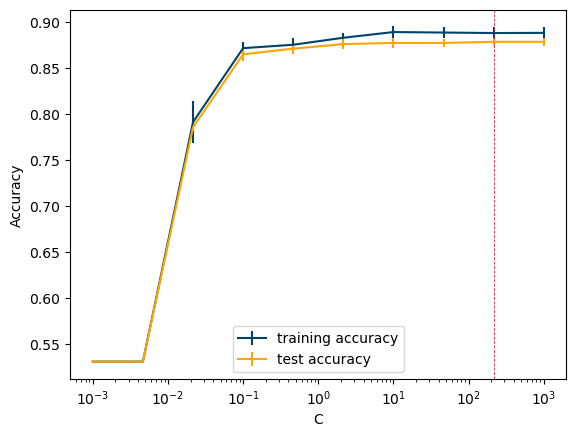

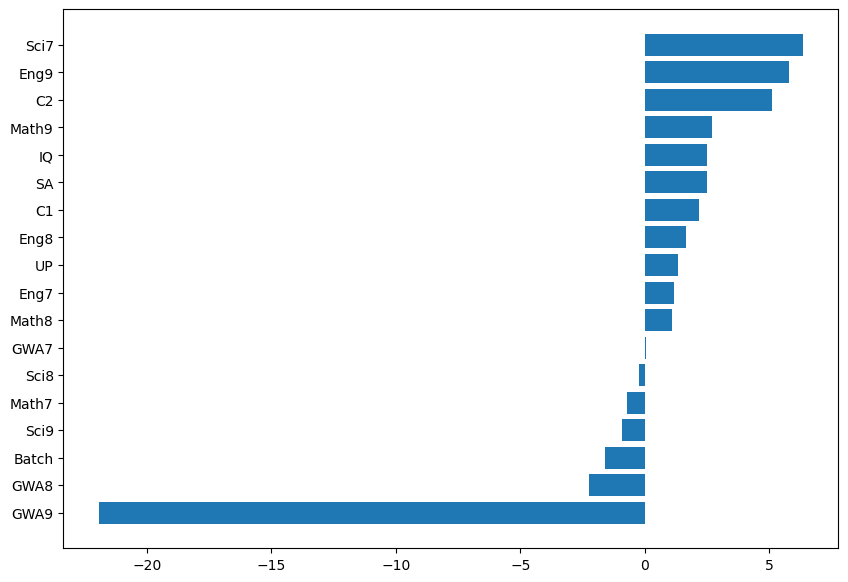

['Logistic Regression (l1)',
 'C',
 215.44346900318823,
 0.8882602545968883,
 0.8787128712871287,
 0.8727722772277227,
 'GWA9',
 5.160188913345337]

In [90]:
res_logi_l1 = train_logistic(X,y, 'l1')
res_logi_l1

LogisticRegression(C=10.0)


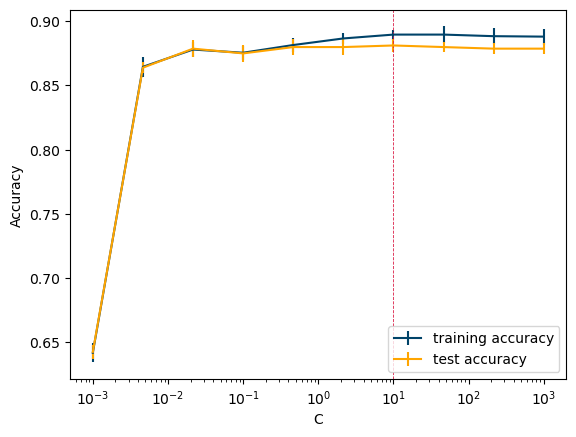

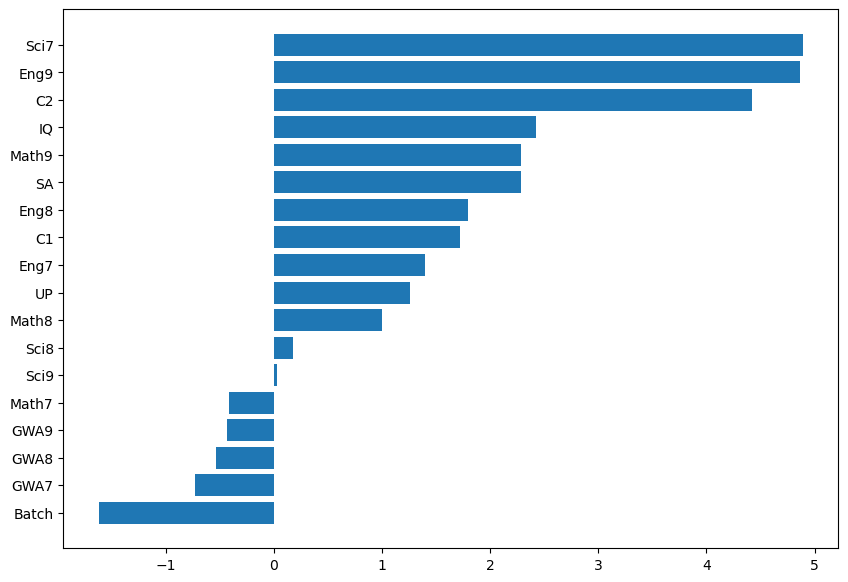

['Logistic Regression (l2)',
 'C',
 10.0,
 0.8896746817538896,
 0.8811881188118812,
 0.8762376237623762,
 'Sci7',
 2.4933218955993652]

In [91]:
res_logi_l2 = train_logistic(X,y, 'l2')
res_logi_l2

## SVC (Non linear)

In [92]:
def train_svc_nonlinear(X,y):
    
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    import time
    from sklearn.svm import SVC
    start_time = time.time()
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    
    
    C_list = np.logspace(-3,3,10)
    parameters = {'kernel': ['poly','rbf', 'sigmoid'],
                  'degree': [2,3,4],
                  'gamma': ['scale'],
                  'C':  C_list}


    GS = GridSearchCV(
        SVC(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

    test_score_list = []

    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

    test_score_means = np.mean(test_score_list)
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['SVC (NonLinear)', 'C, degree, gamma, kernel', best_params, best_train_acc, best_val_acc, test_score_means, 'NA', runtime]


In [93]:
res_svc_nl = train_svc_nonlinear(X, y)
res_svc_nl

SVC(C=0.021544346900318832, kernel='poly')


['SVC (NonLinear)',
 'C, degree, gamma, kernel',
 {'C': 0.021544346900318832, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'},
 0.8919731258840169,
 0.8836633663366338,
 0.8767326732673266,
 'NA',
 53.4226598739624]

## Random Forest CLF

In [101]:
# PLEASE REMOVE SCALING
def RF_clf(X,y):
    import time
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    start_time = time.time()
    max_depth_list = list(np.arange(1,6))
    parameters = {'max_depth': max_depth_list,
                  'criterion': ['gini', 'entropy'],
                  'n_estimators': [100],
                 'max_features': [0.1, .2, .3, .4, .5, .7]}


    GS = GridSearchCV(
        RandomForestClassifier(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

#     GS.best_score_, best_val_acc ###

    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.feature_importances_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)
    # display(coefs_mean)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()
    top_pred = ''
    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['Random Forest CLF', 'criterion, max_depth, max_features, n_estimators',
    best_params, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=0.7)


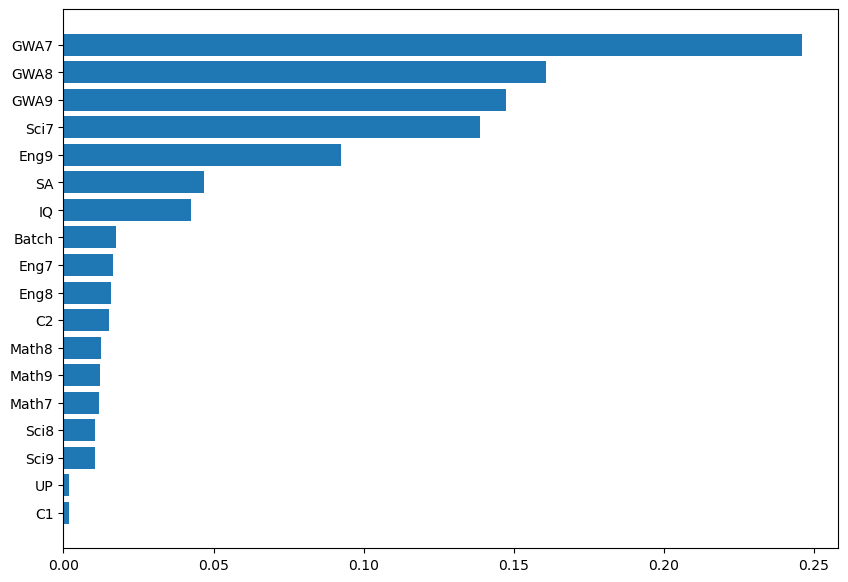

['Random Forest CLF',
 'criterion, max_depth, max_features, n_estimators',
 {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 0.7,
  'n_estimators': 100},
 0.9375884016973126,
 0.8762376237623763,
 0.8707920792079209,
 'GWA7',
 71.77449655532837]

In [102]:
res_RF = RF_clf(X,y)
res_RF

## Gradient Boosting CLF

In [103]:
# PLEASE REMOVE SCALING
def GBM_clf(X,y):
    import time
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import MinMaxScaler
    MM_scaler = MinMaxScaler()
    
    X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                  y,
                                                                  test_size=0.2,
                                                                  random_state=1337)
    X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

    X_test_scaled = MM_scaler.transform(X_test.astype(float))
    
    start_time = time.time()
    max_depth_list = list(np.arange(1,6))
    parameters = {'max_depth': max_depth_list,
                  'n_estimators': [100],
                  'max_features': [0.1, .2, .3, .4, .5, .7],
                  'learning_rate': np.arange(0.01, 0.1, 0.02)}


    GS = GridSearchCV(
        GradientBoostingClassifier(), parameters, cv=8, return_train_score=True
    )

    GS.fit(X_train_full_scaled, y_train_full)

    best_model = GS.best_estimator_
    # best_k = GS.cv_results_['mean_test_score'].argmax()
    print(best_model)
    best_params = GS.best_params_
    best_val_acc = np.amax(GS.cv_results_['mean_test_score'])
    best_train_acc = GS.cv_results_['mean_train_score'][np.argmax(GS.cv_results_['mean_test_score'])]

#     GS.best_score_, best_val_acc ###

    test_score_list = []
    coefs_list = []
    for seed in range(n_trials):

        X_train_full, X_test, y_train_full, y_test = train_test_split(X,
                                                                      y,
                                                                     test_size=0.2,
                                                                      random_state=seed)
        # scale the X_train_full and X_test
        X_train_full_scaled = MM_scaler.fit_transform(X_train_full.astype(float))

        X_test_scaled = MM_scaler.transform(X_test.astype(float))



        best_model.fit(X_train_full_scaled, y_train_full)
        test_score = best_model.score(X_test_scaled, y_test)
        test_score_list.append(test_score)

        coefs = best_model.feature_importances_
        coefs_list.append(coefs)
    test_score_means = np.mean(test_score_list)
    coefs_mean = np.mean(coefs_list, axis=0)
    # display(coefs_mean)

    fig, ax = plt.subplots(figsize=(10,7))
    ax.barh(np.arange(len(coefs_mean)), sorted(coefs_mean))

    ax.set_yticks(np.arange(len(coefs_mean)))
    ax.set_yticklabels(X.columns[np.argsort(coefs_mean)])
    plt.show()
    top_pred = ''
    top_pred = X.columns[np.argmax(np.abs(coefs_mean))]
    runtime = time.time() - start_time
    'Model, Hyperparam, best params, trainacc, valacc, testacc, toppred, runtime'
    return ['GBM CLF', 'learning_rate, max_depth, max_features, n_estimators',
    best_params, best_train_acc, best_val_acc, test_score_means, top_pred, runtime]

GradientBoostingClassifier(learning_rate=0.08999999999999998, max_features=0.3)


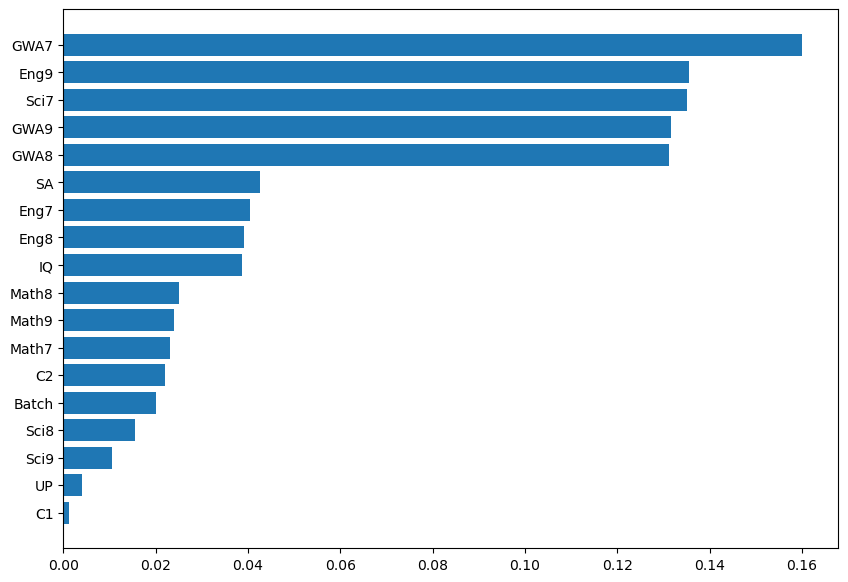

['GBM CLF',
 'learning_rate, max_depth, max_features, n_estimators',
 {'learning_rate': 0.08999999999999998,
  'max_depth': 3,
  'max_features': 0.3,
  'n_estimators': 100},
 0.9775459688826025,
 0.8923267326732673,
 0.8821782178217823,
 'GWA7',
 117.2941243648529]

In [104]:
res_GBM = GBM_clf(X, y)
res_GBM

# Summary

In [105]:
models_list = [res_knn, res_svc_l1, res_svc_l2, res_logi_l1,
              res_logi_l2, res_svc_nl, res_RF, res_GBM]
col_summary = ['ML Model', 
           'Hyperparameter', 
           'Best Parameters', 
           'Best Train Accuracy', 
           'Best Validation Accuracy', 
           'Best Test Accuracy', 
           'Top Predictor', 
           'Run Time']
df_summary = pd.DataFrame(columns=col_summary)

for i, model in enumerate(models_list):
    df_summary.loc[i] = model
df_summary

,ML Model,Hyperparameter,Best Parameters,Best Train Accuracy,Best Validation Accuracy,Best Test Accuracy,Top Predictor,Run Time
0,Knn,n_neighbor,42,0.882426,0.882426,0.873267,NA,22.471612
1,Logistic Regression (l1),C,2.154435,0.887376,0.882426,0.870792,Eng9,2.322818
2,Logistic Regression (l2),C,0.464159,0.886315,0.887376,0.879208,Eng9,1.423191
3,Logistic Regression (l1),C,215.443469,0.888260,0.878713,0.872772,GWA9,5.160189
4,Logistic Regression (l2),C,10.0,0.889675,0.881188,0.876238,Sci7,2.493322
5,SVC (NonLinear),"C, degree, gamma, kernel","{'C': 0.021544346900318832, 'degree': 3, 'gamm...",0.891973,0.883663,0.876733,NA,53.422660
6,Random Forest CLF,"criterion, max_depth, max_features, n_estimators","{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.937588,0.876238,0.870792,GWA7,71.774497
7,GBM CLF,"learning_rate, max_depth, max_features, n_esti...","{'learning_rate': 0.08999999999999998, 'max_de...",0.977546,0.892327,0.882178,GWA7,117.294124


In [106]:
df_summary.loc[:, 'Best Parameters'] = df_summary['Best Parameters'].apply(lambda x: x.values() if type(x)==dict else x)

In [107]:
df_summary

,ML Model,Hyperparameter,Best Parameters,Best Train Accuracy,Best Validation Accuracy,Best Test Accuracy,Top Predictor,Run Time
0,Knn,n_neighbor,42,0.882426,0.882426,0.873267,NA,22.471612
1,Logistic Regression (l1),C,2.154435,0.887376,0.882426,0.870792,Eng9,2.322818
2,Logistic Regression (l2),C,0.464159,0.886315,0.887376,0.879208,Eng9,1.423191
3,Logistic Regression (l1),C,215.443469,0.888260,0.878713,0.872772,GWA9,5.160189
4,Logistic Regression (l2),C,10.0,0.889675,0.881188,0.876238,Sci7,2.493322
5,SVC (NonLinear),"C, degree, gamma, kernel","(0.021544346900318832, 3, scale, poly)",0.891973,0.883663,0.876733,NA,53.422660
6,Random Forest CLF,"criterion, max_depth, max_features, n_estimators","(entropy, 5, 0.7, 100)",0.937588,0.876238,0.870792,GWA7,71.774497
7,GBM CLF,"learning_rate, max_depth, max_features, n_esti...","(0.08999999999999998, 3, 0.3, 100)",0.977546,0.892327,0.882178,GWA7,117.294124
